In [1]:
# Import libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle

In [48]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
# plt.rc('font', size=16)

In [3]:
# Load the prepared dataset

access_log = wrangle.wrangle_curriculum_access_log()

# Print the shape
print(access_log.shape)

# Take a peek at the dataset
access_log.head()

(719459, 9)


,user_id,cohort_id,ip,name,start_date,end_date,program_id,lesson,sublesson
timestamp,,,,,,,,,
2018-01-26 09:55:03,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,homepage,None
2018-01-26 09:56:02,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,java-ii,None
2018-01-26 09:56:05,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,java-ii,object-oriented-programming
2018-01-26 09:56:06,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0,slides,object_oriented_programming
2018-01-26 09:56:24,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0,javascript-i,conditionals


### Q1: Which lesson appears to attract the most traffic consistently across cohorts (per program)?
### Data Science Program

In [4]:
# Create the mask for ds program
mask_ds = (access_log.program_id == 3)

# Create the dataframe for ds program
log_ds = access_log[mask_ds]

# Print the shape
print(log_ds.shape)

# Take a peek at the new df
log_ds.head()

(68017, 9)


,user_id,cohort_id,ip,name,start_date,end_date,program_id,lesson,sublesson
timestamp,,,,,,,,,
2019-08-20 09:39:58,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage,None
2019-08-20 09:39:59,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage,None
2019-08-20 09:39:59,468,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage,None
2019-08-20 09:40:02,469,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage,None
2019-08-20 09:40:08,470,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0,homepage,None


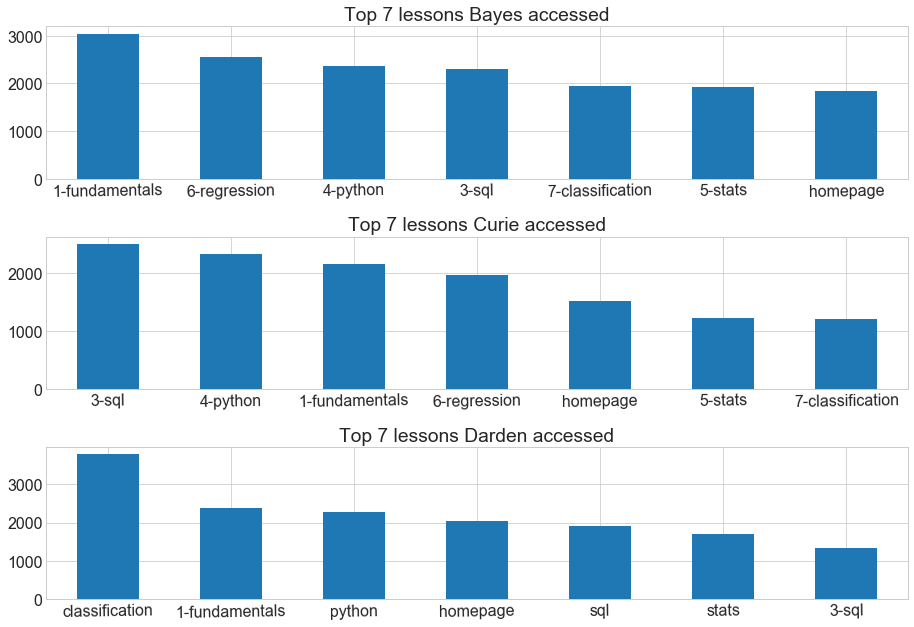

In [13]:
# Create fig and ax objects
fig, axes = plt.subplots(3, 1, figsize=(13,9))

# For Loop to barplot the top 7 lessons each cohort accessed

for ax, (name, subset) in zip(axes, log_ds.groupby('name')):
    subset.lesson.value_counts(ascending=False).head(7).plot(kind='bar', rot=1, ax=ax)
    ax.set_title(f'Top 7 lessons {name} accessed')

plt.tight_layout()

### Web Development
- I will focused on the most recent three cohorts: 58, 61, 62

In [11]:
# Create the mask for wd program
mask_recent_wd = (access_log.cohort_id == 58) | (access_log.cohort_id == 61) | (access_log.cohort_id == 62)

# Create the dataframe for ds program
log_recent_wd = access_log[mask_recent_wd]

# Print the shape
print(log_recent_wd.shape)

# Take a peek at the new df
log_recent_wd.head()

(48846, 9)


,user_id,cohort_id,ip,name,start_date,end_date,program_id,lesson,sublesson
timestamp,,,,,,,,,
2020-05-26 16:21:50,655,58.0,107.128.2.166,Hyperion,2020-05-26,2020-11-10,2.0,homepage,None
2020-05-26 17:03:59,655,58.0,107.128.2.166,Hyperion,2020-05-26,2020-11-10,2.0,toc,None
2020-05-26 17:04:28,655,58.0,107.128.2.166,Hyperion,2020-05-26,2020-11-10,2.0,html-css,None
2020-05-27 00:31:09,655,58.0,162.194.247.205,Hyperion,2020-05-26,2020-11-10,2.0,homepage,None
2020-05-27 00:31:24,655,58.0,162.194.247.205,Hyperion,2020-05-26,2020-11-10,2.0,homepage,None


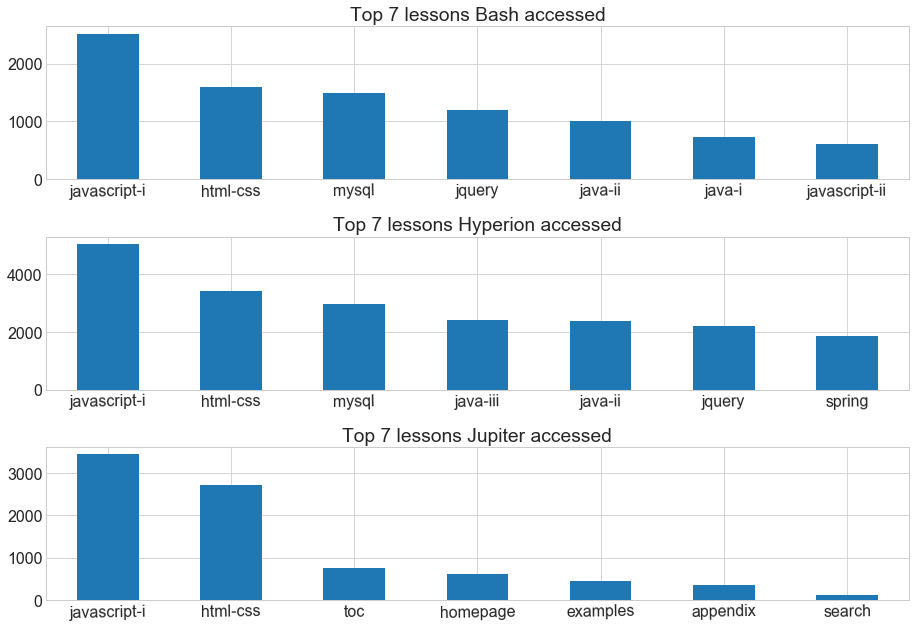

In [12]:
# Create fig and ax objects
fig, axes = plt.subplots(3, 1, figsize=(13,9))

# For Loop to barplot the top 7 lessons each cohort accessed

for ax, (name, subset) in zip(axes, log_recent_wd.groupby('name')):
    subset.lesson.value_counts(ascending=False).head(7).plot(kind='bar', rot=1, ax=ax)
    ax.set_title(f'Top 7 lessons {name} accessed')

plt.tight_layout()

### Q2: Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over? 

### Data Science Program

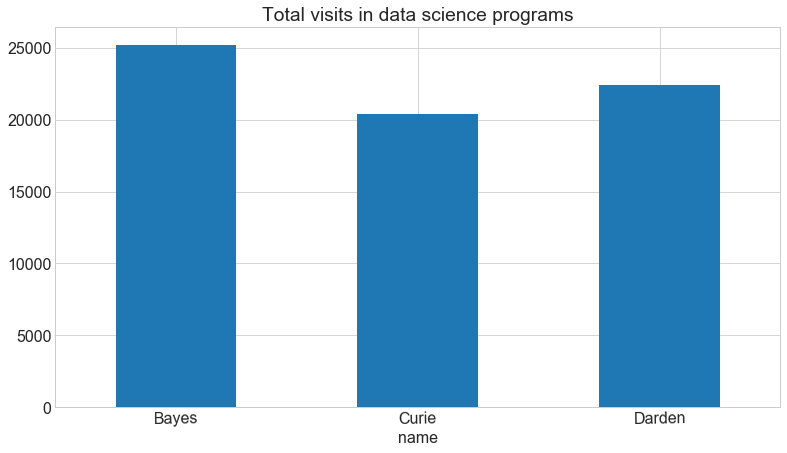

In [18]:
# Plot the total visits based on cohorts

log_ds.groupby('name').lesson.size().plot(kind='bar', rot=1)
plt.title('Total visits in data science programs')
plt.show()

In [38]:
# Create the dataframe 

log_ds_lesson = log_ds.groupby(['name', 'lesson']).user_id.count().unstack(0)

# Print the shape
print(log_ds_lesson.shape)

log_ds_lesson # I need to clean the dataframe

(113, 3)


name,Bayes,Curie,Darden
lesson,,,
%20https:,NaN,1.0,NaN
",%20https:",NaN,1.0,NaN
1-fundamentals,3044.0,2148.0,2385.0
1-overview,2.0,NaN,NaN
1.2-data-science-pipeline,NaN,NaN,5.0
...,...,...,...
stats-assessment,NaN,1.0,NaN
storytelling,6.0,22.0,764.0
timeseries,34.0,106.0,630.0


In [39]:
# Drop the missing values

log_ds_lesson.dropna(axis=0, inplace=True)

# Print the shape
print(log_ds_lesson.shape)

log_ds_lesson

(28, 3)


name,Bayes,Curie,Darden
lesson,,,
1-fundamentals,3044.0,2148.0,2385.0
10-anomaly-detection,1197.0,928.0,28.0
11-nlp,1102.0,735.0,1.0
12-distributed-ml,620.0,375.0,1.0
13-advanced-topics,601.0,404.0,3.0
2-storytelling,804.0,683.0,126.0
3-sql,2307.0,2498.0,1351.0
4-python,2368.0,2326.0,134.0
5-stats,1918.0,1225.0,211.0


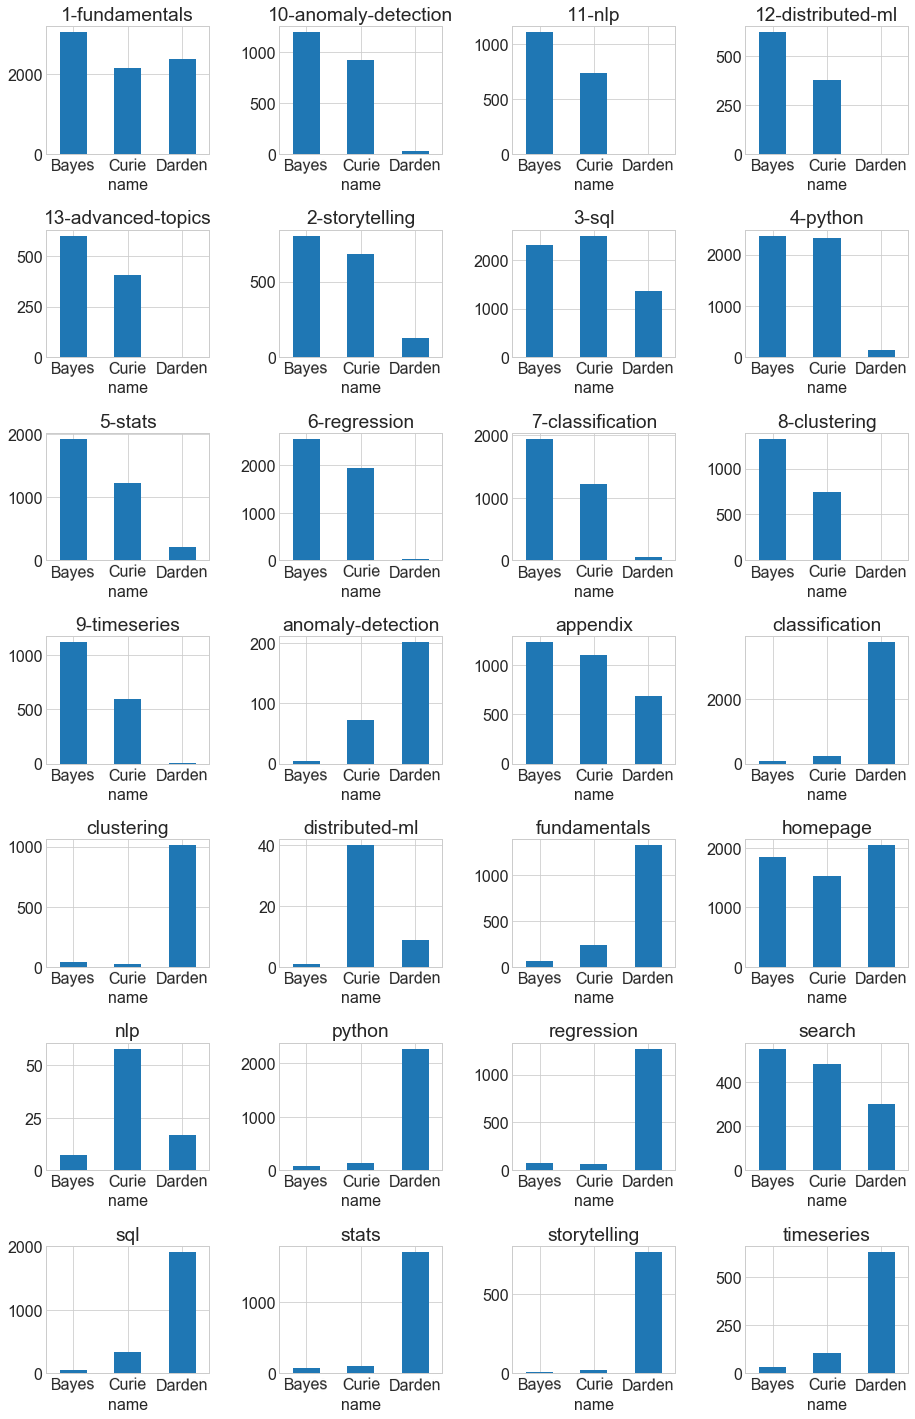

In [52]:
# Create a list of lessons
lessons = log_ds_lesson.index.to_list()

# Create the figures grids
fig, axes = plt.subplots(7, 4, figsize=(13, 20))

# Flatten axes to a 1D array
ax = axes.ravel()

for i, lesson in zip(range(28), lessons):
    log_ds_lesson.loc[lesson, :].plot(kind='bar', ax=ax[i], rot=1)
    ax[i].set_title(f'{lesson}')
    
plt.tight_layout()
plt.show()

### Web Development
- I will focused on the most recent three cohorts: 58, 61, 62

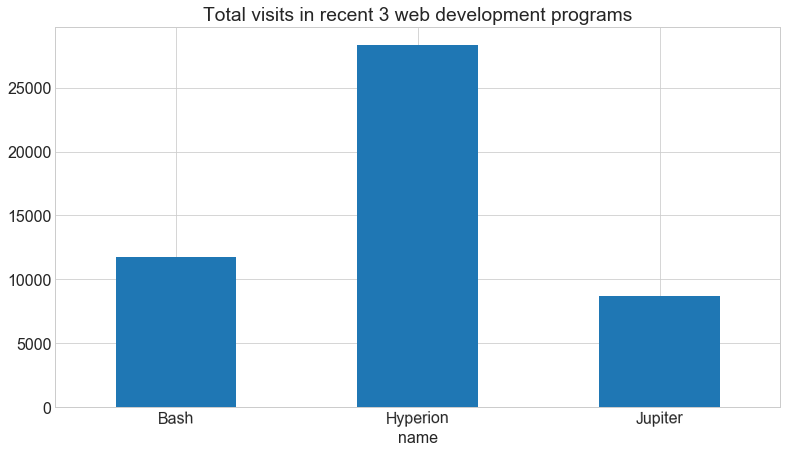

In [53]:
# Plot the total visits based on recent 3 cohorts

log_recent_wd.groupby('name').lesson.size().plot(kind='bar', rot=1)
plt.title('Total visits in recent 3 web development programs')
plt.show()

In [54]:
# Create the dataframe 

log_recent_wd_lesson = log_recent_wd.groupby(['name', 'lesson']).user_id.count().unstack(0)

# Print the shape
print(log_recent_wd_lesson.shape)

log_recent_wd_lesson # I need to clean the dataframe

(71, 3)


name,Bash,Hyperion,Jupiter
lesson,,,
.well-known,NaN,2.0,NaN
advanced-topics,9.0,NaN,NaN
anomaly-detection,5.0,NaN,NaN
appendix,520.0,1216.0,361.0
asset-manifest.json,NaN,NaN,1.0
...,...,...,...
tools,NaN,1.0,NaN
user-input,NaN,3.0,NaN
users,11.0,NaN,NaN


In [55]:
# Drop the missing values

log_recent_wd_lesson.dropna(axis=0, inplace=True)

# Print the shape
print(log_recent_wd_lesson.shape)

log_recent_wd_lesson

(20, 3)


name,Bash,Hyperion,Jupiter
lesson,,,
appendix,520.0,1216.0,361.0
assets,1.0,1.0,4.0
capstone,50.0,326.0,22.0
examples,366.0,631.0,443.0
homepage,532.0,1245.0,600.0
html-css,1597.0,3427.0,2725.0
introduction,4.0,1.0,3.0
java-i,740.0,1552.0,35.0
java-ii,1013.0,2370.0,11.0


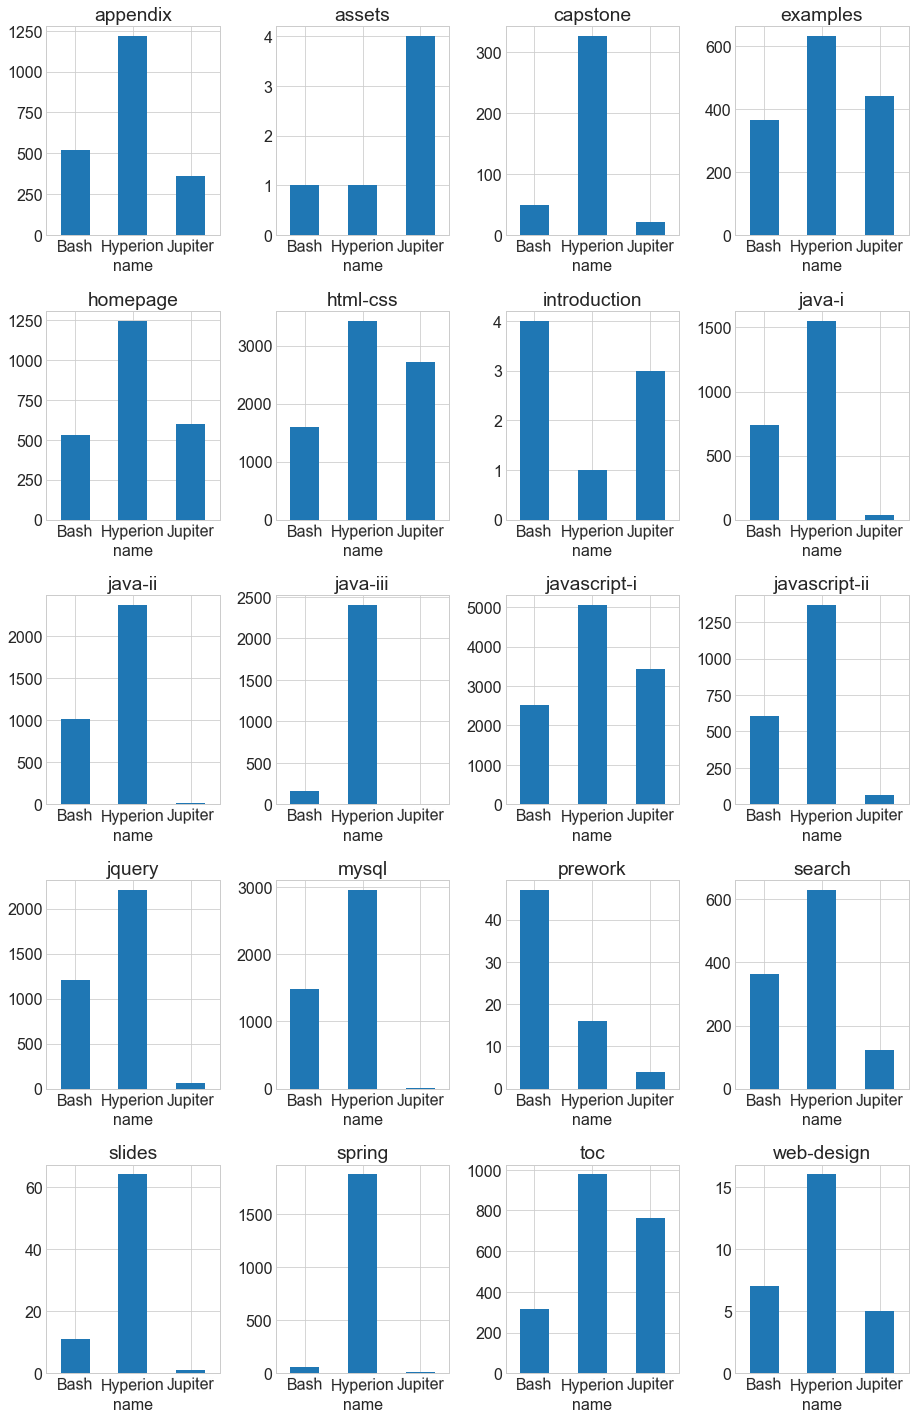

In [57]:
# Create a list of lessons
wd_lessons = log_recent_wd_lesson.index.to_list()

# Create the figures grids
fig, axes = plt.subplots(5, 4, figsize=(13, 20))

# Flatten axes to a 1D array
ax = axes.ravel()

for i, lesson in zip(range(28), wd_lessons):
    log_recent_wd_lesson.loc[lesson, :].plot(kind='bar', ax=ax[i], rot=1)
    ax[i].set_title(f'{lesson}')
    
plt.tight_layout()
plt.show()